<a href="https://colab.research.google.com/github/stac-bot/Pytorch-for-Deep-Learning/blob/main/lessson1_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 
# if somebody asks to plot something, then please plot it here in this notebook
 # if somebody changes library code while I'm running this, please reload it automatically

In [ ]:
# Load fastai library
from fastai import *
from fastai.vision.all import *


In [ ]:
!pip install nbdev


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 67 kB 6.6 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 1.6 MB 60.2 MB/s 
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.5.25
    Uninstalling fastcore-1.5.25:
      Successfully uninstalled fastcore-1.5.25


In [ ]:
from fastai.vision import *

In [ ]:
path = untar_data(URLs.PETS)
path.ls()

#7393) [Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/keeshond_34.jpg'),...]

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'
    Download `url` using `FastDownload.get`



In [ ]:
path; print(path.ls())

[Path('/root/.fastai/data/oxford-iiit-pet/annotations'), Path('/root/.fastai/data/oxford-iiit-pet/images')]


In [ ]:
path_anno = path/'annotation'
path_img = path/'images'


In [ ]:
# get_img_file will grab an array of all of the images files based on extension in a path
fnames = get_image_files(path_img)
fnames[:5]


(#5) [Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_138.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_51.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_24.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_146.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_5.jpg')]

In [ ]:
# what we need for vision model is 
# pictures  and lables


In [ ]:
np.random.seed(42)
# using re to get the labels 
pat = re.compile(r'/([^/]+)_\d+.jpg$')

ImageDataBunch.from_name_re is going to return a DataBunch object. In fastai, everything you model with is going to be a DataBunch object. Basically DataBunch object contains 2 or 3 datasets - it contains your training data, validation data, and optionally test data. For each of those, it contains your images and your labels, your texts and your labels, or your tabular data and your labels, or so forth. And that all sits there in this one place(i.e. data).

In [ ]:
data = ImageDataLoaders.from_path_re(path_img, fnames,pat, item_tfms=Resize(244),bs=64)
                              

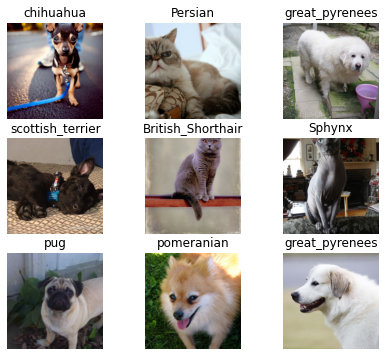

In [ ]:
data.show_batch(figsize=(7,6))

In [ ]:
help(data)

Help on DataLoaders in module fastai.data.core object:

class DataLoaders(fastcore.basics.GetAttr)
 |  DataLoaders(*loaders, path: 'str | Path' = '.', device=None)
 |  
 |  Basic wrapper around several `DataLoader`s.
 |  
 |  Method resolution order:
 |      DataLoaders
 |      fastcore.basics.GetAttr
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, i)
 |      Retrieve `DataLoader` at `i` (`0` is training, `1` is validation)
 |  
 |  __init__(self, *loaders, path: 'str | Path' = '.', device=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |  
 |  add_tfms(self, tfms, event, loaders=None)
 |      Add `tfms` to `loaders` for `event
 |  
 |  cpu(self)
 |      Use the cpu
 |  
 |  cuda(self)
 |      Use accelerator if available
 |  
 |  new_empty(self)
 |      Create a new empty version of `self` with the same transforms
 |  
 |  test_dl(self: 'DataLoaders', test_items, rm_type_tfms=None, with_labels: 'boo

train the model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.907573,0.326759,0.108254,00:56
1,0.646930,0.228851,0.077808,00:51
2,0.359858,0.191172,0.065629,00:50
3,0.257734,0.183700,0.065629,00:50


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.save('stage-1')

Path('/root/.fastai/data/oxford-iiit-pet/images/models/stage-1.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

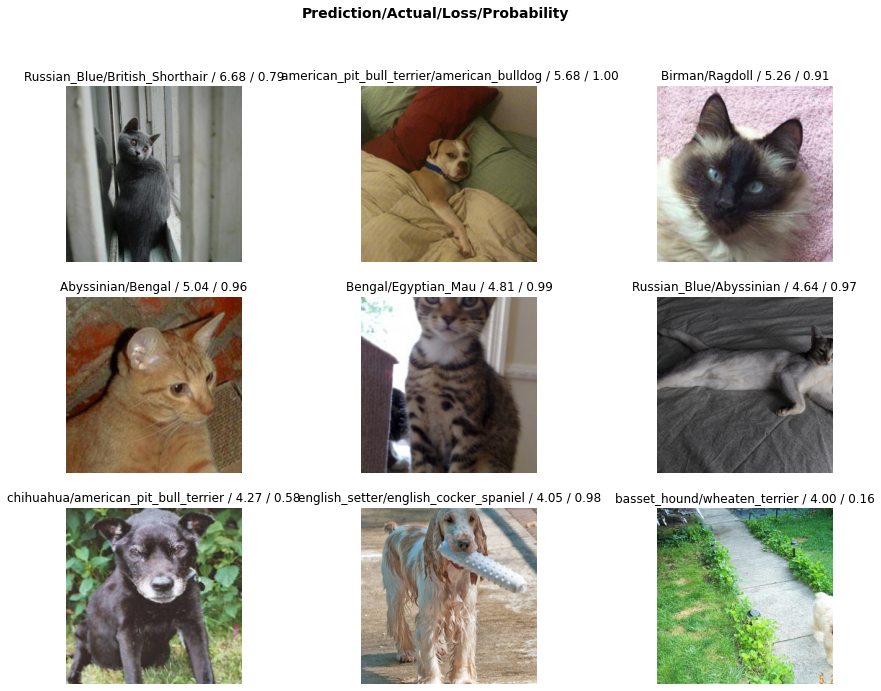

In [ ]:
interp.plot_top_losses(9, figsize = (15,11))

In [ ]:
doc(interp.plot_top_losses)

Interpretation.plot_top_losses(k: 'int | list', largest: 'bool' = True, **kwargs)
Show `k` largest(/smallest) preds and losses. Implementation based on type dispatch

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


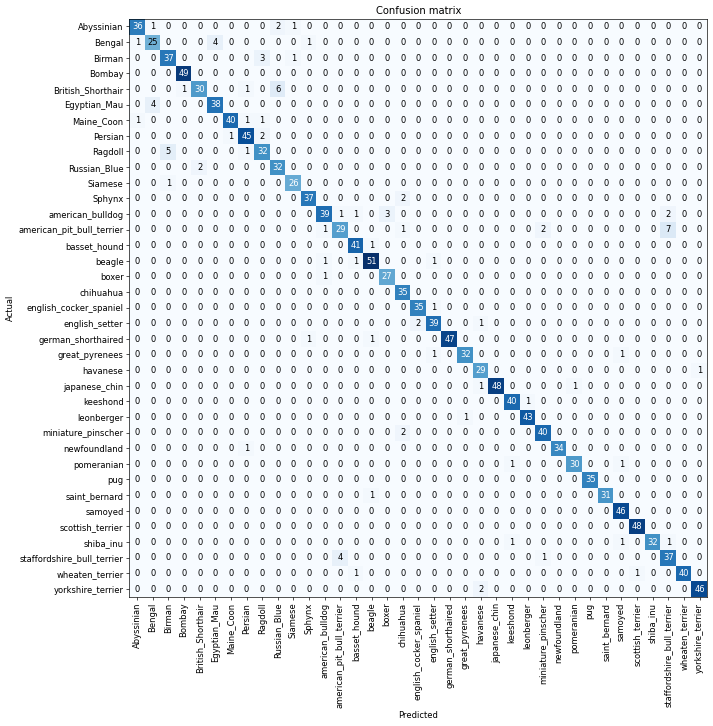

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Birman', 'Ragdoll', 3),
 ('american_bulldog', 'boxer', 3),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('yorkshire_terrier', 'havanese', 2)]

unfreezing, fine-tuning, and learning rates

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.230356,0.587894,0.185386,00:54


SuggestedLRs(valley=9.120108734350652e-05)

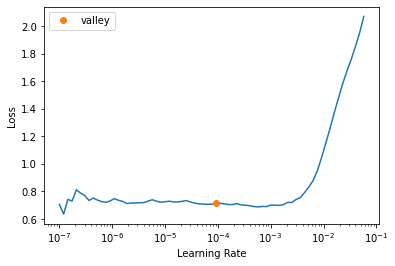

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2,1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.537883,0.445039,0.141407,00:55
1,0.361861,0.322823,0.099459,00:54


In [ ]:
#jargon: Transfer learning: Using a pretrained model for a task different to what it was originally trained for.
#Fine-tuning: A transfer learning technique where the parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.


In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

Path('/root/.fastai/data/mnist_sample')

In [ ]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [ ]:
doc(ImageDataLoaders)

ImageDataLoaders(*loaders, path: 'str | Path' = '.', device=None)
Basic wrapper around several `DataLoader`s with factory methods for computer vision problems

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, 
                                      seed=42, label_func=is_cat, item_tfms=Resize(244))
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.155420,0.032229,0.009472,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.059171,0.053366,0.013532,00:54
1,0.028912,0.015737,0.004736,00:53


## Other than Image classification segmentation

#### Here is how we can train a segmentation model with fastai, using a subset of the Camvid dataset from the paper "Semantic Object Classes in Video: A High-Definition Ground Truth Database" by Gabruel J. Brostow, Julien Fauqueur, and Roberto Cipolla:

In [ ]:
#download the data with untar
path = untar_data(URLs.CAMVID_TINY)

In [ ]:
path.ls() # contains images # labels folders 

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [ ]:
# code.txt file contains the integers to class
codes = np.loadtxt(path/'codes.txt',dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

Segmentation using high-level API

In [ ]:
# grabing all the files from the folder
fnames = get_image_files(path/'images')
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0016E5_06570.png')

In [ ]:
(path/"labels").ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f01890_P.png')

In [ ]:
#how to grab the last part
# by defining function
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [ ]:
# gathering data using dataloaders
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=fnames, label_func = label_func,
    codes=codes
)

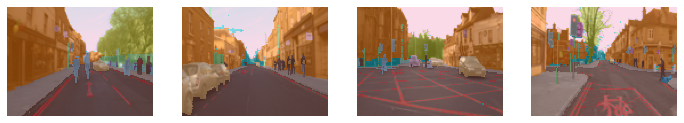

In [ ]:
dls.show_batch(max_n=4, nrows=1)

`A traditional CNN won’t work for segmentation, we have to use a special kind of model called a UNet, so we use unet_learner to define our Learner:`

In [ ]:
learn = unet_learner(dls,resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.344811,2.536890,00:10


epoch,train_loss,valid_loss,time
0,2.030625,1.698491,00:01
1,1.691156,1.303393,00:01
2,1.495542,1.211507,00:01
3,1.341822,0.963106,00:01
4,1.207971,0.875234,00:01
5,1.089308,0.777296,00:01
6,0.990246,0.733134,00:01
7,0.912771,0.739151,00:01


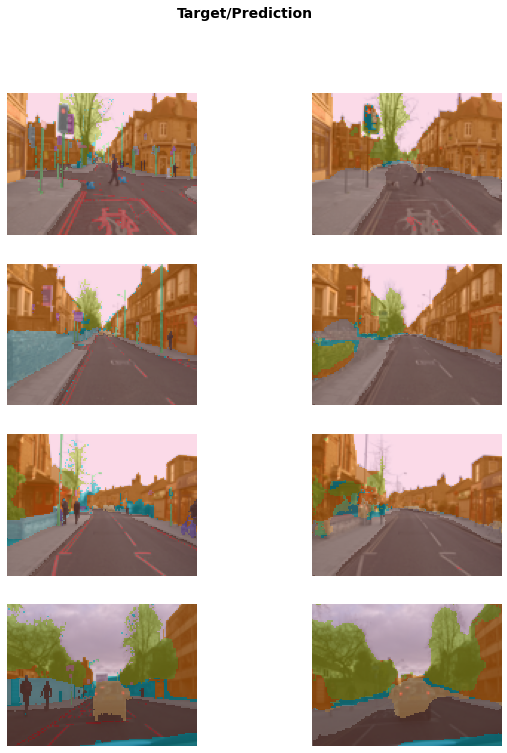

In [ ]:
learn.show_results(max_n=4,figsize=(10,12))

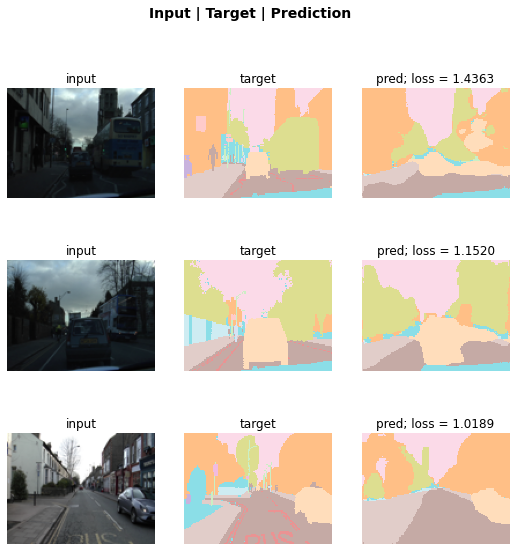

In [ ]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

Other area where deep learning is used is NLP

In [ ]:
import fastai

In [ ]:
from fastai.text.all import *

In [ ]:
path = untar_data(URLs.IMDB)
path.ls()

(#7) [Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/tmp_lm'),Path('/root/.fastai/data/imdb/train'),Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/test'),Path('/root/.fastai/data/imdb/tmp_clas'),Path('/root/.fastai/data/imdb/imdb.vocab')]

In [ ]:
import pandas as pd
df = pd.read_csv(path/'imdb.vocab')
df

,the
0,and
1,a
2,of
3,to
4,is
...,...
89521,copywrite
89522,artbox
89523,kinky-sex
89524,urrrghhh


(#1) [Path('/root/.fastai/data/imdb_sample/texts.csv')]

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
df = pd.read_csv(path/'texts.csv')
df.head(2)

,label,text,is_valid
0,negative,"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!",False
1,positive,"This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is som...",False


In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
df = pd.read_csv(path/'texts.csv')
imdb_clas = DataBlock(blocks=(TextBlock.from_df('text', seq_len=72), CategoryBlock),
                      get_x=ColReader('text'), get_y=ColReader('label'), splitter=ColSplitter())
dls = imdb_clas.dataloaders(df, bs=64)

Train the model 

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=accuracy)
learn.fine_tune(4,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.620610,0.647173,0.575000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.451661,0.576513,0.675000,00:13
1,0.388396,0.485217,0.785000,00:13
2,0.308796,0.488524,0.790000,00:13
3,0.247965,0.533314,0.800000,00:13


In [ ]:
learn.predict("I hate Humans and Love Machines")
# here the first part is the probability that is 0.16% positive and 99% negative

('positive', tensor(1), tensor([0.0016, 0.9984]))

In [ ]:
doc(learn.predict)

>Tabular: Data that is in the form of a table, such as from a spreadsheet, database, or CSV file. A tabular model is a model that tries to predict one column of a table based on information in other columns of the table.

In [1]:
from fastai.tabular.all import *

In [4]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/export.pkl'),Path('/root/.fastai/data/adult_sample/models')]

In [5]:
import pandas as pd
df = pd.read_csv(path/'adult.csv')

In [7]:
df.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k


In [10]:
dls = TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names='salary',
      cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
      cont_names = ['age','fnlwgt','education-num'],
      procs = [Categorify,FillMissing, Normalize])

In [16]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))


In [18]:
to = TabularPandas(df, procs=[Categorify,FillMissing,Normalize],
                   cat_names=['workclass','education','marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'fnlwgt', 'education-num'],
                   y_names='salary',
                   splits=splits
                   )

In [19]:
to.xs.iloc[:3]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
10049,5,12,2,9,6,5,1,-0.042731,0.348936,-0.423030
8061,5,12,5,6,2,5,1,-0.409630,-0.992128,-0.423030
2635,5,13,3,11,1,5,1,-0.189490,-0.780823,1.538017


In [20]:
dls = to.dataloaders(bs=64)


In [23]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,HS-grad,Married-civ-spouse,#na#,Wife,White,False,44.000000,378251.004329,9.0,<50k
1,Private,Assoc-voc,Divorced,Adm-clerical,Unmarried,White,False,30.000000,176175.000595,11.0,<50k
2,Private,Some-college,Never-married,Adm-clerical,Own-child,White,False,23.000000,186014.000014,10.0,<50k
3,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,False,23.000000,237719.999750,13.0,<50k
4,Private,Bachelors,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,False,26.000000,190649.999986,13.0,<50k
5,Private,HS-grad,Married-civ-spouse,Other-service,Husband,White,False,48.000000,199590.000254,9.0,>=50k
6,Self-emp-not-inc,Bachelors,Never-married,Exec-managerial,Not-in-family,White,False,77.999999,316260.996044,13.0,>=50k
7,Private,5th-6th,Widowed,Priv-house-serv,Not-in-family,Asian-Pac-Islander,False,70.999999,99894.000700,3.0,<50k
8,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,False,28.000000,251904.997937,15.0,<50k
9,Self-emp-not-inc,9th,Married-civ-spouse,Craft-repair,Husband,White,False,35.000000,188539.999977,5.0,<50k


In [24]:
learn = tabular_learner(dls,metrics = accuracy)

In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.363605,0.364940,0.832770,00:06


In [26]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,10.0,3.0,2.0,1.0,5.0,1.0,1.278104,-0.696895,1.145808,1.0,1.0
1,7.0,16.0,3.0,5.0,1.0,1.0,1.0,0.470927,0.470276,-0.030821,0.0,1.0
2,5.0,12.0,5.0,4.0,4.0,5.0,1.0,-1.290186,0.241930,-0.423030,0.0,0.0
3,5.0,9.0,3.0,8.0,6.0,5.0,1.0,0.764446,-0.400911,0.361389,0.0,0.0
4,5.0,16.0,6.0,13.0,5.0,5.0,1.0,1.718382,-0.760308,-0.030821,0.0,0.0
5,5.0,16.0,3.0,12.0,1.0,3.0,1.0,-0.483009,0.254480,-0.030821,0.0,0.0
6,5.0,16.0,5.0,4.0,4.0,1.0,1.0,-0.776528,-1.553054,-0.030821,0.0,0.0
7,8.0,16.0,3.0,9.0,1.0,5.0,1.0,0.617687,0.153388,-0.030821,0.0,0.0
8,5.0,12.0,3.0,12.0,1.0,5.0,1.0,-0.262870,0.684373,-0.423030,0.0,0.0


In [27]:
row, clas, probs = learn.predict(df.iloc[0])

In [36]:
clas,probs

(tensor(1), tensor([0.4481, 0.5519]))

In [37]:
test_df = df.copy()
test_df.drop(['salary'],axis=1,inplace=True)
dl = learn.dls.test_dl(test_df)

In [40]:
learn.get_preds(dl=dl
              )

(tensor([[0.4481, 0.5519],
         [0.4697, 0.5303],
         [0.9263, 0.0737],
         ...,
         [0.6062, 0.3938],
         [0.7373, 0.2627],
         [0.7239, 0.2761]]), None)

In [41]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()